In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Code optionnel pour éliminer les warnings

from warnings import filterwarnings
filterwarnings('ignore')

Text(0, 0.5, 'y=f(x)')

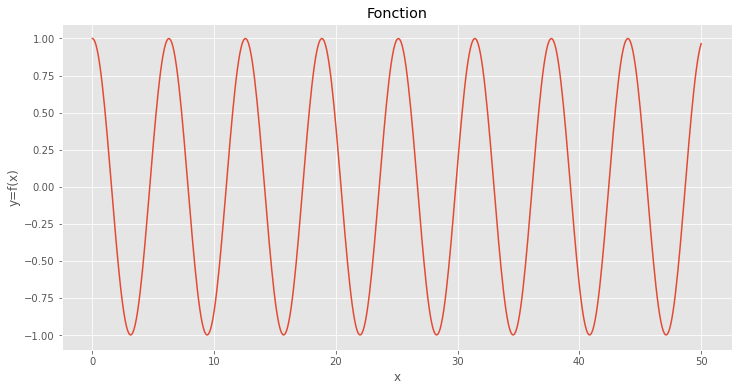

In [2]:
plt.figure(figsize=(12,6))
x = np.linspace(0,50,500)
y = np.cos(x)
plt.plot(x,y)
plt.title('Fonction')
plt.xlabel('x')
plt.ylabel('y=f(x)')

In [3]:
df = pd.DataFrame(data=y, index=x, columns=['f(x)'])
df.head()

,f(x)
0.000000,1.000000
0.100200,0.994984
0.200401,0.979987
0.300601,0.955159
0.400802,0.920749


<h1>Répartition Train/Test<h1>

In [4]:
len(df)

500

In [5]:
test_pourcent=0.2  #20% des données pour les tests

In [6]:
#point de separation du jeu de train et du jeu de test
len(df)*test_pourcent

100.0

In [7]:
index_sep=int(len(df)-len(df)*test_pourcent)
index_sep

400

In [8]:
train_set=df.iloc[:index_sep]
test_set=df.iloc[index_sep:]

In [9]:
train_set

,f(x)
0.000000,1.000000
0.100200,0.994984
0.200401,0.979987
0.300601,0.955159
0.400802,0.920749
...,...
39.579158,-0.304344
39.679359,-0.398105
39.779559,-0.487873
39.879760,-0.572746


In [10]:
test_set

,f(x)
40.080160,-0.724461
40.180361,-0.789781
40.280561,-0.847179
40.380762,-0.896078
40.480962,-0.935987
...,...
49.599198,0.786124
49.699399,0.844008
49.799599,0.893425
49.899800,0.933880


<h1>Mise à l'échelle des données </h1>

In [11]:
from sklearn.preprocessing import MinMaxScaler as MMS

In [12]:
scaler = MMS()
scaler.fit(train_set)

MinMaxScaler()

In [13]:
scaled_train=scaler.transform(train_set)
scaled_test=scaler.transform(test_set)

In [14]:
#Class pour générer des batch ou lot de sequence temporel
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length=50
batch_size=1

generator=TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [15]:
len(generator)

350

In [16]:
X,y=generator[0] 

In [17]:
X

array([[[1.00000000e+00],
        [9.97492047e-01],
        [9.89993348e-01],
        [9.77579127e-01],
        [9.60373920e-01],
        [9.38550325e-01],
        [9.12327271e-01],
        [8.81967820e-01],
        [8.47776529e-01],
        [8.10096397e-01],
        [7.69305419e-01],
        [7.25812799e-01],
        [6.80054844e-01],
        [6.32490584e-01],
        [5.83597171e-01],
        [5.33865090e-01],
        [4.83793240e-01],
        [4.33883927e-01],
        [3.84637828e-01],
        [3.36548967e-01],
        [2.90099756e-01],
        [2.45756162e-01],
        [2.03963028e-01],
        [1.65139610e-01],
        [1.29675375e-01],
        [9.79260892e-02],
        [7.02102533e-02],
        [4.68059048e-02],
        [2.79478296e-02],
        [1.38252066e-02],
        [4.57971015e-03],
        [3.04088465e-04],
        [1.04123340e-03],
        [6.78375012e-03],
        [1.74740313e-02],
        [3.30048350e-02],
        [5.32203605e-02],
        [7.79178112e-02],
        [1.0

In [18]:
y

array([[0.646625]])

<h1>Création du modèle </h1>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [20]:
n_features=1

In [21]:
model=Sequential()


In [22]:
model.add(SimpleRNN(50, input_shape=(length,n_features)))  #SimpleRNN
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(generator, epochs=8)

Epoch 1/8
350/350 [==============================] - 6s 14ms/step - loss: 0.0229
Epoch 2/8
350/350 [==============================] - 6s 17ms/step - loss: 1.6667e-04
Epoch 3/8
350/350 [==============================] - 5s 16ms/step - loss: 1.4633e-04
Epoch 4/8
350/350 [==============================] - 3s 7ms/step - loss: 4.5023e-05
Epoch 5/8
350/350 [==============================] - 2s 7ms/step - loss: 3.4378e-05
Epoch 6/8
350/350 [==============================] - 2s 5ms/step - loss: 1.0986e-04
Epoch 7/8
350/350 [==============================] - 2s 5ms/step - loss: 1.9871e-04
Epoch 8/8
350/350 [==============================] - 2s 6ms/step - loss: 9.7159e-06


<AxesSubplot:>

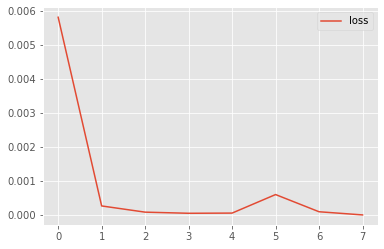

In [25]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [26]:
first_eval_batch=scaled_train[-length:]

In [27]:
first_eval_batch=first_eval_batch.reshape(1,length, n_features)

In [28]:
model.predict(first_eval_batch)

array([[0.13588452]], dtype=float32)

In [29]:
scaled_test[0]

array([0.13776189])

In [30]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length, n_features)

In [31]:
first_eval_batch

array([[0.06426077],
       [0.09097777],
       [0.12179793],
       [0.15641206],
       [0.19447293],
       [0.23559871],
       [0.27937686],
       [0.32536818],
       [0.37311132],
       [0.42212733],
       [0.47192449],
       [0.52200326],
       [0.57186125],
       [0.6209983 ],
       [0.66892148],
       [0.71515005],
       [0.75922025],
       [0.80068998],
       [0.83914323],
       [0.87419424],
       [0.90549139],
       [0.93272072],
       [0.95560908],
       [0.97392684],
       [0.98749026],
       [0.99616327],
       [0.99985886],
       [0.99853996],
       [0.9922198 ],
       [0.98096178],
       [0.96487885],
       [0.94413234],
       [0.91893036],
       [0.88952576],
       [0.85621349],
       [0.81932774],
       [0.77923854],
       [0.73634806],
       [0.69108655],
       [0.64390807],
       [0.5952859 ],
       [0.5457078 ],
       [0.49567113],
       [0.44567785],
       [0.39622946],
       [0.34782203],
       [0.30094116],
       [0.256

In [32]:
np.append(current_batch[:,1:,:],[[[99]]], axis=1)

array([[[9.09777726e-02],
        [1.21797930e-01],
        [1.56412062e-01],
        [1.94472929e-01],
        [2.35598714e-01],
        [2.79376856e-01],
        [3.25368183e-01],
        [3.73111324e-01],
        [4.22127333e-01],
        [4.71924495e-01],
        [5.22003258e-01],
        [5.71861246e-01],
        [6.20998298e-01],
        [6.68921484e-01],
        [7.15150053e-01],
        [7.59220251e-01],
        [8.00689980e-01],
        [8.39143226e-01],
        [8.74194237e-01],
        [9.05491390e-01],
        [9.32720722e-01],
        [9.55609076e-01],
        [9.73926841e-01],
        [9.87490260e-01],
        [9.96163267e-01],
        [9.99858857e-01],
        [9.98539958e-01],
        [9.92219800e-01],
        [9.80961785e-01],
        [9.64878850e-01],
        [9.44132336e-01],
        [9.18930364e-01],
        [8.89525756e-01],
        [8.56213488e-01],
        [8.19327741e-01],
        [7.79238543e-01],
        [7.36348057e-01],
        [6.91086548e-01],
        [6.4

In [33]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]  #length derniers points
current_batch=first_eval_batch.reshape(1,length, n_features)

for i in range(len(test_set)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)  #décalage de current_batch
    

In [34]:
 test_predictions

[array([0.13588452], dtype=float32),
 array([0.10349774], dtype=float32),
 array([0.07416802], dtype=float32),
 array([0.04933044], dtype=float32),
 array([0.02898343], dtype=float32),
 array([0.01300178], dtype=float32),
 array([0.00220936], dtype=float32),
 array([-0.00379339], dtype=float32),
 array([-0.00497709], dtype=float32),
 array([-0.00204764], dtype=float32),
 array([0.0065258], dtype=float32),
 array([0.0188259], dtype=float32),
 array([0.03624624], dtype=float32),
 array([0.05782311], dtype=float32),
 array([0.0835728], dtype=float32),
 array([0.11379983], dtype=float32),
 array([0.14761966], dtype=float32),
 array([0.18509598], dtype=float32),
 array([0.22545475], dtype=float32),
 array([0.2693481], dtype=float32),
 array([0.31516], dtype=float32),
 array([0.36391428], dtype=float32),
 array([0.4137823], dtype=float32),
 array([0.46546692], dtype=float32),
 array([0.51735497], dtype=float32),
 array([0.5702479], dtype=float32),
 array([0.6224164], dtype=float32),
 array([

In [35]:
scaled_test

array([[1.37761889e-01],
       [1.05101400e-01],
       [7.64023804e-02],
       [5.19527302e-02],
       [3.19977217e-02],
       [1.67375382e-02],
       [6.32526541e-03],
       [8.65356492e-04],
       [4.12583706e-04],
       [4.97148914e-03],
       [1.44963391e-02],
       [2.88915830e-02],
       [4.80128117e-02],
       [7.16682063e-02],
       [9.96204625e-02],
       [1.31589171e-01],
       [1.67253630e-01],
       [2.06256065e-01],
       [2.48205213e-01],
       [2.92680253e-01],
       [3.39235022e-01],
       [3.87402497e-01],
       [4.36699474e-01],
       [4.86631421e-01],
       [5.36697433e-01],
       [5.86395262e-01],
       [6.35226354e-01],
       [6.82700849e-01],
       [7.28342494e-01],
       [7.71693427e-01],
       [8.12318763e-01],
       [8.49810959e-01],
       [8.83793904e-01],
       [9.13926691e-01],
       [9.39907036e-01],
       [9.61474311e-01],
       [9.78412160e-01],
       [9.90550666e-01],
       [9.97768060e-01],
       [9.99991938e-01],


In [36]:
true_predictions=scaler.inverse_transform(test_predictions)

In [37]:
true_predictions

array([[-0.72821571],
       [-0.7929887 ],
       [-0.85164763],
       [-0.90132236],
       [-0.94201602],
       [-0.97397902],
       [-0.99556368],
       [-1.00756907],
       [-1.00993644],
       [-1.0040776 ],
       [-0.98693087],
       [-0.96233088],
       [-0.92749052],
       [-0.88433715],
       [-0.83283824],
       [-0.7723847 ],
       [-0.70474563],
       [-0.62979366],
       [-0.54907684],
       [-0.46129088],
       [-0.3696679 ],
       [-0.27216021],
       [-0.17242506],
       [-0.06905674],
       [ 0.03471845],
       [ 0.14050336],
       [ 0.24483942],
       [ 0.34720866],
       [ 0.44661974],
       [ 0.54096675],
       [ 0.63035874],
       [ 0.71202639],
       [ 0.7866641 ],
       [ 0.85114432],
       [ 0.90707205],
       [ 0.95209152],
       [ 0.9870702 ],
       [ 1.01108565],
       [ 1.0245228 ],
       [ 1.02756524],
       [ 1.0197838 ],
       [ 1.00302479],
       [ 0.9756876 ],
       [ 0.94024806],
       [ 0.89550468],
       [ 0

In [38]:
test_set['Pred']=true_predictions

<AxesSubplot:>

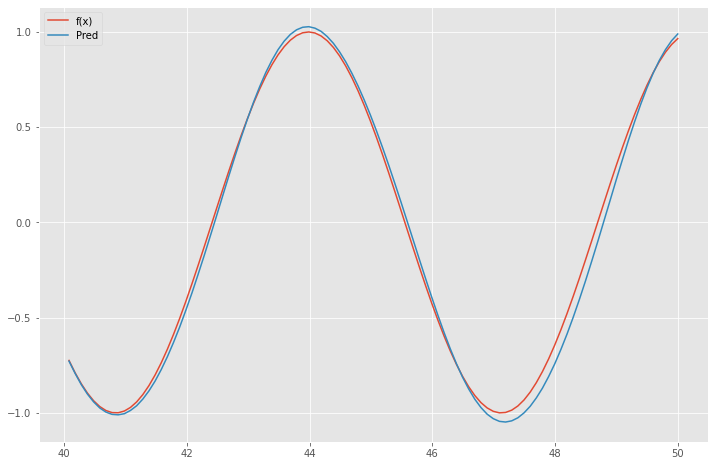

In [39]:
test_set.plot(figsize=(12,8))